# 0. Getting the data

## 0.1. BeautifulSoup Scraping
Have tried practicing scraping from several sites for a bit, not only do there exist some features of data which cannot be scapre from those websites, but might have some violations of websites' term of use. To be lawful, I have request for NYC house price from Zillow.

## 0.2 NYC house price data from NYC.gov:
https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page

The purpose of this project is to find if there is any correlation between variables and used them to prdict future house price in NYC.

# 1. Check data and plan out data wrangling strategy
## 1.0 Import all the toolboxes needed for analysis purpose

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


sns.set()

## 1.1 Read csv files, organized & concatenation
### 1.1.1 Manhattan

In [2]:
man2013 = pd.read_csv('data/NYC/2013_manhattan.csv')
man2014 = pd.read_csv('data/NYC/2014_manhattan.csv')
man2015 = pd.read_csv('data/NYC/2015_manhattan.csv')
man2016 = pd.read_csv('data/NYC/2016_manhattan.csv')
man2017 = pd.read_csv('data/NYC/2017_manhattan.csv')
man2018 = pd.read_csv('data/NYC/2018_manhattan.csv')
man_test = pd.read_csv('data/NYC/rollingsales_manhattan.csv')

In [3]:
# Set to show every columns of the dataset
pd.set_option('display.max_columns', None)
# From the head, realizing that due to the transformation from Excel to csv, the real data starts at row4, 
# and the column name should be those on row3, so dropping the first 4 rows and concatenate the data, 
# then replace the column name.
man2013.head(7)

,"MANHATTAN ANNUALIZE SALES FOR 2013. (All Sales From Jan 1, 2013 - Dec 31, 2013.)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2014 Coop Sales Files a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name and Descriptive Data is as o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,375,41,,S2,65 AVENUE D,,10009,2,1,3,"1,614","3,040",1899,\t1,S2,"$\t1,560,000.00",7/18/13
5,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,,C0,243 EAST 7TH STREET,,10009,3,0,3,"2,381","3,084",1899,\t1,C0,"$\t3,150,000.00",3/6/13
6,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,,R6,238 EAST 4TH STREET,-,10009,1,0,1,0,0,1955,\t1,R6,"$\t3,450,000.00",3/27/13


In [4]:
# We realized here that first of all the \n will be really annoying
# Secondly, all the words are uppercase this have to be changed
# Thirdly, some features are too lenghthy
# Finally, replace spaces with '_'

column_name = list(man2013.loc[3])

for i in range(0, len(column_name)):
    column_name[i] = column_name[i].replace('\n','')

for i in range(0, len(column_name)):
    column_name[i] = column_name[i].replace('-','')
    
for i in range(0, len(column_name)):
    column_name[i] = column_name[i].replace(' ','_')   
column_name = [i.lower() for i in column_name]

#column_name

In [5]:
# Drop the first 4 rows which happened to be error from the transformation of Excel files
man2013 = man2013.drop([0,1,2,3]).reset_index(drop=True)
man2014 = man2014.drop([0,1,2,3]).reset_index(drop=True)
man2015 = man2015.drop([0,1,2,3]).reset_index(drop=True)
man2016 = man2016.drop([0,1,2,3]).reset_index(drop=True)
man2017 = man2017.drop([0,1,2,3]).reset_index(drop=True)
man2018 = man2018.drop([0,1,2,3]).reset_index(drop=True)
man_test = man_test.drop([0,1,2,3]).reset_index(drop=True)
# Renamed the columns with the correct features
man2013.columns = column_name
man2014.columns = column_name
man2015.columns = column_name
man2016.columns = column_name
man2017.columns = column_name
man2018.columns = column_name
man_test.columns = column_name

In [6]:
man = pd.concat([man2013, man2014, man2015, man2016, man2017, man2018], ignore_index=True)

In [7]:
#man.head()

In [8]:
# man.info()
man.to_csv('data/NYC/man.csv', index=False)

In [9]:
# man_test.info()
man_test.to_csv('data/NYC/man_test.csv', index=False)
man.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,375,41,,S2,65 AVENUE D,,10009,2,1,3,"1,614","3,040",1899,\t1,S2,"$\t1,560,000.00",7/18/13
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,,C0,243 EAST 7TH STREET,,10009,3,0,3,"2,381","3,084",1899,\t1,C0,"$\t3,150,000.00",3/6/13
2,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1102,,R6,238 EAST 4TH STREET,-,10009,1,0,1,0,0,1955,\t1,R6,"$\t3,450,000.00",3/27/13
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,6,,C4,24 AVENUE C,,10009,6,1,7,"2,325","5,381",1900,\t2,C4,$\t-,12/4/13
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374,1,,C7,303 EAST 4TH STREET,,10009,8,2,10,"1,501","6,929",1900,\t2,C7,$\t-,2/5/13


### 1.2.2 Brooklyn

In [10]:
bk2013 = pd.read_csv('data/NYC/2013_brooklyn.csv')
bk2014 = pd.read_csv('data/NYC/2014_brooklyn.csv')
bk2015 = pd.read_csv('data/NYC/2015_brooklyn.csv')
bk2016 = pd.read_csv('data/NYC/2016_brooklyn.csv')
bk2017 = pd.read_csv('data/NYC/2017_brooklyn.csv')
bk2018 = pd.read_csv('data/NYC/2018_brooklyn.csv')
bk_test = pd.read_csv('data/NYC/rollingsales_brooklyn.csv')
# bk2013.head()
bk2013 = bk2013.drop([0,1,2,3]).reset_index(drop=True)
bk2014 = bk2014.drop([0,1,2,3]).reset_index(drop=True)
bk2015 = bk2015.drop([0,1,2,3]).reset_index(drop=True)
bk2016 = bk2016.drop([0,1,2,3]).reset_index(drop=True)
bk2017 = bk2017.drop([0,1,2,3]).reset_index(drop=True)
bk2018 = bk2018.drop([0,1,2,3]).reset_index(drop=True)
bk_test = bk_test.drop([0,1,2,3]).reset_index(drop=True)
# Renamed the columns with the correct features
bk2013.columns = column_name
bk2014.columns = column_name
bk2015.columns = column_name
bk2016.columns = column_name
bk2017.columns = column_name
bk2018.columns = column_name
bk_test.columns = column_name

In [11]:
bk = pd.concat([bk2013, bk2014, bk2015, bk2016, bk2017, bk2018], ignore_index=True)

In [12]:
#bk.head()
#bk.info()
#bk_test.info()
bk.to_csv('data/NYC/bk.csv', index=False)
bk_test.to_csv('data/NYC/bk_test.csv', index=False)

### 1.2.3 Queens

In [13]:
qns2013 = pd.read_csv('data/NYC/2013_queens.csv')
qns2014 = pd.read_csv('data/NYC/2014_queens.csv')
qns2015 = pd.read_csv('data/NYC/2015_queens.csv')
qns2016 = pd.read_csv('data/NYC/2016_queens.csv')
qns2017 = pd.read_csv('data/NYC/2017_queens.csv')
qns2018 = pd.read_csv('data/NYC/2018_queens.csv')
qns_test = pd.read_csv('data/NYC/rollingsales_queens.csv')
# qns2013.head()
qns2013 = qns2013.drop([0,1,2,3]).reset_index(drop=True)
qns2014 = qns2014.drop([0,1,2,3]).reset_index(drop=True)
qns2015 = qns2015.drop([0,1,2,3]).reset_index(drop=True)
qns2016 = qns2016.drop([0,1,2,3]).reset_index(drop=True)
qns2017 = qns2017.drop([0,1,2,3]).reset_index(drop=True)
qns2018 = qns2018.drop([0,1,2,3]).reset_index(drop=True)
qns_test = qns_test.drop([0,1,2,3]).reset_index(drop=True)
# Renamed the columns with the correct features
qns2013.columns = column_name
qns2014.columns = column_name
qns2015.columns = column_name
qns2016.columns = column_name
qns2017.columns = column_name
qns2018.columns = column_name
qns_test.columns = column_name

In [14]:
qns = pd.concat([qns2013, qns2014, qns2015, qns2016, qns2017, qns2018], ignore_index=True)

In [15]:
#qns.head()
#qns.info()
#qns_test.info()
qns.to_csv('data/NYC/qns.csv', index=False)
qns_test.to_csv('data/NYC/qns_test.csv', index=False)

### 1.2.4 Bronx

In [16]:
bx2013 = pd.read_csv('data/NYC/2013_bronx.csv')
bx2014 = pd.read_csv('data/NYC/2014_bronx.csv')
bx2015 = pd.read_csv('data/NYC/2015_bronx.csv')
bx2016 = pd.read_csv('data/NYC/2016_bronx.csv')
bx2017 = pd.read_csv('data/NYC/2017_bronx.csv')
bx2018 = pd.read_csv('data/NYC/2018_bronx.csv')
bx_test = pd.read_csv('data/NYC/rollingsales_bronx.csv')
# qns2013.head()
bx2013 = bx2013.drop([0,1,2,3]).reset_index(drop=True)
bx2014 = bx2014.drop([0,1,2,3]).reset_index(drop=True)
bx2015 = bx2015.drop([0,1,2,3]).reset_index(drop=True)
bx2016 = bx2016.drop([0,1,2,3]).reset_index(drop=True)
bx2017 = bx2017.drop([0,1,2,3]).reset_index(drop=True)
bx2018 = bx2018.drop([0,1,2,3]).reset_index(drop=True)
bx_test = bx_test.drop([0,1,2,3]).reset_index(drop=True)
# Renamed the columns with the correct features
bx2013.columns = column_name
bx2014.columns = column_name
bx2015.columns = column_name
bx2016.columns = column_name
bx2017.columns = column_name
bx2018.columns = column_name
bx_test.columns = column_name

In [17]:
bx = pd.concat([bx2013, bx2014, bx2015, bx2016, bx2017, bx2018], ignore_index=True)

In [18]:
#bx.head()
#bx.info()
#bx_test.info()
bx.to_csv('data/NYC/bx.csv', index=False)
bx_test.to_csv('data/NYC/bx_test.csv', index=False)

### 1.2.5 Staten Island

In [19]:
stn2013 = pd.read_csv('data/NYC/2013_statenisland.csv')
stn2014 = pd.read_csv('data/NYC/2014_statenisland.csv')
stn2015 = pd.read_csv('data/NYC/2015_statenisland.csv')
stn2016 = pd.read_csv('data/NYC/2016_statenisland.csv')
stn2017 = pd.read_csv('data/NYC/2017_statenisland.csv')
stn2018 = pd.read_csv('data/NYC/2018_statenisland.csv')
stn_test = pd.read_csv('data/NYC/rollingsales_statenisland.csv')
# qns2013.head()
stn2013 = stn2013.drop([0,1,2,3]).reset_index(drop=True)
stn2014 = stn2014.drop([0,1,2,3]).reset_index(drop=True)
stn2015 = stn2015.drop([0,1,2,3]).reset_index(drop=True)
stn2016 = stn2016.drop([0,1,2,3]).reset_index(drop=True)
stn2017 = stn2017.drop([0,1,2,3]).reset_index(drop=True)
stn2018 = stn2018.drop([0,1,2,3]).reset_index(drop=True)
stn_test = stn_test.drop([0,1,2,3]).reset_index(drop=True)
# Renamed the columns with the correct features
stn2013.columns = column_name
stn2014.columns = column_name
stn2015.columns = column_name
stn2016.columns = column_name
stn2017.columns = column_name
stn2018.columns = column_name
stn_test.columns = column_name

In [20]:
stn = pd.concat([stn2013, stn2014, stn2015, stn2016, stn2017, stn2018], ignore_index=True)

In [21]:
#stn.head()
#stn.info()
#stn_test.info()
stn.to_csv('data/NYC/stn.csv', index=False)
stn_test.to_csv('data/NYC/stn_test.csv', index=False)

### 1.2.6 New York City

In [22]:
nyc = pd.concat([man, bk, qns, bx, stn], ignore_index=True)
nyc_test = pd.concat([man_test, bk_test, qns_test, bx_test, stn_test], ignore_index=True)

In [23]:
# nyc = pd.concat([man, bk, qns, bx, stn, man_test, bk_test, qns_test, bx_test, stn_test], ignore_index=True)

# 2. Understand, clean up & format each column:

## 2.1 Understand each column

find other dataset, population, stock market

In [24]:
## nyc.sale_date.describe()--change it to time stamp.

In [25]:
# nyc.head()

In [26]:
nyc.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'easement',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

## 2.2 Borough & Neighborhood column:

### 2.2.1 Borough
There is no problem for the borough columns

In [27]:
# nyc.borough.unique()

### 2.2.2 Neighborhood
By sorting out the neighboorhood column, I realized there exist variables with '-' which is going to be replaced by '_' here. There are some values with spaces which cause repetition(eg: 'Flushing', 'Flushing        '), going to use the strip method to remove the spaces. With all the space in between two words(eg: 'Alphabet    City'), going to replace it with '_'. Finally, lowercase everything. Since the dataset is kind of huge, going to run it with progression line to estimate runtime.

In [28]:
# Import time bar to know the progression
from tqdm import tqdm_notebook as tqdm

In [29]:
nyc.neighborhood = nyc.neighborhood.str.replace('-','_')
nyc.neighborhood = nyc.neighborhood.str.strip()
nyc.neighborhood = nyc.neighborhood.str.replace('/','_')
nyc.neighborhood = nyc.neighborhood.str.replace('.','')
nyc.neighborhood = nyc.neighborhood.str.replace(' ','_')

In [30]:
nyc.neighborhood = nyc.neighborhood.str.lower()

In [31]:
# nyc1 is a dataset with a cleaned neighborhood column.
nyc.to_csv('data/NYC/nyc1.csv', index=False)
nyc1 = pd.read_csv('data/NYC/nyc1.csv', index_col=False)

/Users/justin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2.3 Sale_price( target variables )
The procedure of sorting through the neighborhood column takes a significant amount of time, and I start to realized that our target variable is the price, the price column should be sorted and cleaned first, since those rows without a price will be dropped, which can save me some time for future data wranggling.

### 2.3.1 Sale_price cleaning

In [32]:
# nyc1.sale_price.value_counts()

In [33]:
# Find the sum of all the 0 or nan, for latter check
print(len(nyc1[nyc1.sale_price==' $\t-   '])+len(nyc1[nyc.sale_price==' \t-   '])+len(nyc1[nyc.sale_price=='$0'])+len(nyc1[nyc.sale_price=='0']))

161105


In [34]:
# nyc1.sale_price.value_counts()
# Realized there are $\t-, that need to be get rid off
# Clean - up . part later just incase they turn add tenth, hundredth into interger

nyc1.sale_price = nyc1.sale_price.str.replace('$','')
nyc1.sale_price = nyc1.sale_price.str.replace('\t','')
nyc1.sale_price = nyc1.sale_price.str.replace('-','')
nyc1.sale_price = nyc1.sale_price.str.replace(',','')
nyc1.sale_price = nyc1.sale_price.str.strip()
# This will replace all the '' with 0(Indicate it has to start with blank and end with blanks with ^ and $)
nyc1.sale_price.replace(r'^\s*$', '0', regex=True, inplace = True)
# nyc1.sale_price = nyc1.sale_price.str.replace('.00','')


In [35]:
# Using the following function first will generate error:
# invalid literal for int() with base 10: '3650100.00'
# nyc1.sale_price.astype(int)

In [36]:
# nyc1.sale_price = nyc1.sale_price.str.replace('.00','')--> cannot use this, will clean
# up all the double 00
len(nyc1[nyc1.sale_price=='0'])

# By adding the to_numeric can use astype to change the series into int
nyc1.sale_price = pd.to_numeric(nyc1.sale_price)
# Int will have issue with those data with decimals
nyc1.sale_price.astype(int)
len(nyc1[nyc1.sale_price==0])

161105

In [37]:
nyc1.to_csv('data/NYC/nyc2.csv', index=False)
nyc2 = pd.read_csv('data/NYC/nyc2.csv', index_col=False)

### 2.3.2 Define & remove outliers from column sale_price (To be continue later)
It is hard to define the lower end outliers, need to clean up other columns to help set filter to define outliers.

In [38]:
nyc3 = nyc2[nyc2.sale_price != 0].reset_index(drop=True)
# c = nyc2.sale_price.value_counts()
# nyc3.sale_price.describe()

In [39]:
# Originally thought that 4 billion dollars house is not possible,
# after printing out the property of that price, however, it contains 8,805 units,
# which makes it reasonable for the price.
# Since, the higher price is reasonable, going to focus on defining outliers on the lower end.

# c = sorted(set(nyc.sale_price.unique()))
nyc[nyc.sale_price.str.contains('4,111,111,766')]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
58302,1,kips_bay,08 RENTALS - ELEVATOR APARTMENTS,2,972,1,,D7,240 1 AVENUE,,10009,"8,759",46,"8,805","2,675,000","8,942,176",1945,\t2,D7,"$4,111,111,766",12/18/15


10.0
52500.0


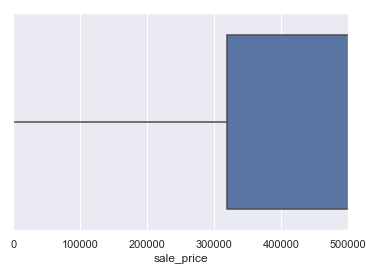

In [40]:
# Try to plot out the boxplot to see where to set the unreasonable price and drop them,
# But we cannot really see the outliers from the plot
sns.boxplot(nyc3.sale_price)
plt.xlim(0, 500000)
# print(len(nyc3[nyc3.sale_price <= 20000]))



#It appears, by testing, that seaborn uses whis=1.5 as the default.
# whis is defined as the
# Proportion of the IQR past the low and high quartiles to extend the plot whiskers.
# For a normal distribution, the interquartile range contains 50% of the population 
# and 1.5 * IQR contains about 99%.

# interquartile range (IQR): 25th to the 75th percentile.
#“maximum”: Q3 + 1.5*IQR
#“minimum”: Q1 -1.5*IQR

# whisker is the line in boxplot connecting minimum and 25%, 75% and maximum


# winsorized trimming for the lower end
# winsorixed mean is just the mean after removal of percentiles at the tails
# This trimming method should be helpful to remove the 1% of tails, but it is $10 for the
# 1% percentile which is still not reasonable
# Setting at 5%, can have dangerous losing some valuable data
# Going to use other methods to define outliers
print(np.percentile(nyc3.sale_price, 1))
print(np.percentile(nyc3.sale_price, 5))

In [41]:
# Choose a price that's a little bit higher than the 5% percentile($52500),
# From observation we realized that it could be possible to get a house with $60000
# if the house is more than a 100 years old with a fairly small gross sq feet
# Before making filter, going to first organized the 
# land_square_feet, gross_square_feet, year_built columns


# nyc3[nyc3.sale_price==60000]

## 2.4 Land_square_feet & gross_square_feet & year_built columns
SQ_feet / 10 = SQ_meter

### 2.4.1 Land_square_feet
The land area of the property listed in square feet. 

In [42]:
# Since originally there are no 0 in this column, so the replaced 0 can be see as NaN later.
len(nyc3[nyc3.land_square_feet==0])

0

In [43]:
nyc3.land_square_feet.value_counts()

nyc3.land_square_feet = nyc3.land_square_feet.str.replace('\t','')
nyc3.land_square_feet = nyc3.land_square_feet.str.replace('-','')
nyc3.land_square_feet = nyc3.land_square_feet.str.replace(',','')
nyc3.land_square_feet = nyc3.land_square_feet.str.strip()
nyc3.land_square_feet.replace(r'^\s*$', '0', regex=True, inplace = True)
# nyc3.land_square_feet.value_counts()

### 2.4.2 Gross_square_feet
The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. 

In [44]:
# Since originally there are no 0 in this column, so the replaced 0 can be see as NaN later.
len(nyc3[nyc3.gross_square_feet==0])

0

In [45]:
nyc3.gross_square_feet.value_counts()
nyc3.gross_square_feet = nyc3.gross_square_feet.str.replace('\t','')
nyc3.gross_square_feet = nyc3.gross_square_feet.str.replace('-','')
nyc3.gross_square_feet = nyc3.gross_square_feet.str.replace(',','')
nyc3.gross_square_feet = nyc3.gross_square_feet.str.strip()
nyc3.gross_square_feet.replace(r'^\s*$', '0', regex=True, inplace = True)
# nyc3.gross_square_feet.value_counts()

### 2.4.3 Year_built

In [46]:
nyc3[(nyc3.year_built < 1800) & (nyc3.year_built != 0)]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
42524,1,greenwich_village_west,03 THREE FAMILY DWELLINGS,1,586,16,,C0,14 LEROY STREET,,10014.0,3,0,3,1600,4360,1798.0,1,C0,6615000.0,1/29/15
75970,1,chelsea,29 COMMERCIAL GARAGES,4,799,70,,G6,7 AVENUE,,10011.0,0,0,0,2125,0,1111.0,4,G6,8208750.0,4/21/17
125207,3,crown_heights,03 THREE FAMILY DWELLINGS,1,1380,73,,C0,1521 SAINT JOHNS PLACE,,11213.0,3,1,3,2405,3340,1380.0,1,C0,600000.0,12/10/14
125208,3,crown_heights,03 THREE FAMILY DWELLINGS,1,1380,73,,C0,1521 SAINT JOHNS PLACE,,11213.0,3,1,3,2405,3340,1380.0,1,C0,10.0,12/10/14
136195,3,bedford_stuyvesant,02 TWO FAMILY DWELLINGS,1,1664,62,,B3,391 MACON STREET,,11233.0,2,0,2,1975,3420,1050.0,1,B3,2200000.0,6/4/15


In [47]:
# It is not suspicious for the building built after year 1800 
nyc3.year_built.value_counts()

# After researching on the following 5 building, 
# 75957 cannot be checked, going to drop this row.
# 125207, 125208, 136195 are all built in 1899, going to replace the value
nyc3.year_built.iloc[75970]==np.NaN
nyc3.year_built.iloc[125207]='1899'
nyc3.year_built.iloc[125208]='1899'
nyc3.year_built.iloc[136195]='1899'

/Users/justin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
nyc3.year_built.fillna('0', inplace=True)

In [49]:
dtype={'land_square_feet': int}
dtype={'gross_square_feet': int}
dtype={'year_built': int}
nyc3.to_csv('data/NYC/nyc3.csv', index=False)
nyc4 = pd.read_csv('data/NYC/nyc3.csv', index_col=False)

/Users/justin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
nyc4.to_csv('data/NYC/nyc4.csv', index=False)
nyc5 = pd.read_csv('data/NYC/nyc4.csv', index_col=False)

## 2.5 Clean outliers in the sale_price column ( To Be continued!)

### How to make a filter to filter out noise and error, and can avoid biased?

In [51]:
# you usually have to save it to a new datafram when doing modification 
# inplace()can help you to save it to the original
## it is always better to save it to a new one

By plotting out the graph for sales price VS gross sqaure feet, I thought I will have a clear cluster of outliers which I can remove, but from the distribution of the points in the graph it does not seem like there is a definite outliers. It is hard to define a thershold in this case since I filter out those with property which are sold at 40000USD with less than 200 sqft, the appear to be parking lot, which is totally possible. 

In this case, my first concern is to group and clean property type, which is the building_class_category column.

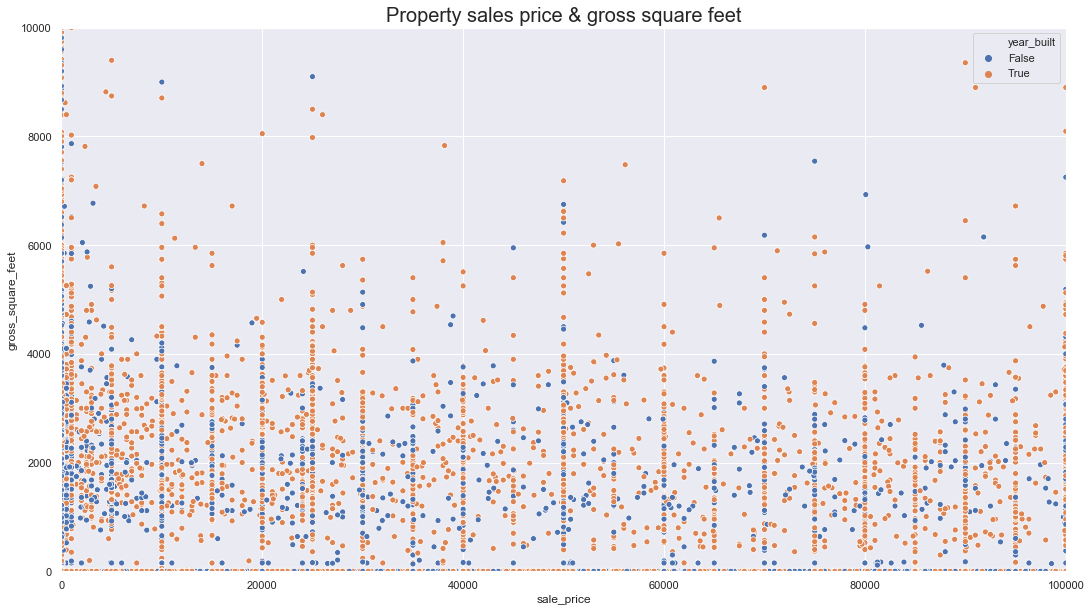

In [52]:
sns.set(rc={'figure.figsize':(18,10)})

# nyc5.info()
ax = sns.scatterplot(nyc5.sale_price, nyc5.gross_square_feet, hue=(nyc5.year_built<=1940));
ax.set(xlim = (0, 100000));
ax.set(ylim = (0, 10000));
plt.title("Property sales price & gross square feet", size=20);

# pick cut off 40K, takes 2 groups compare median and mean

In [53]:
nyc5[(nyc5.sale_price==40000) & (nyc5.gross_square_feet <= 200) &  (nyc5.gross_square_feet > 0)]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
184604,3,bedford_stuyvesant,44 CONDO PARKING,4,1896,1231,NaN,RG,159 CLASSON AVENUE,P5,11205.0,0,1,1,10530.0,153.0,2005.0,4,RG,40000.0,8/30/18
295490,4,flushing_south,44 CONDO PARKING,4,6542,1092,NaN,RG,152-72 MELBOURNE AVENUE,2,11367.0,0,1.0,1,20732.0,162.0,1963.0,4,RG,40000.0,3/26/18


My second thought is to creat a price per sqft column to use it to filter out outliers

In [54]:
# nyc5.cost_per_sq.value_counts()

In [55]:
# nyc5['cost_per_sq'] = (nyc5.sale_price / nyc5.gross_square_feet)
# nyc5.cost_per_sq.replace(np.inf, 0, inplace=True)
# nyc5.cost_per_sq.replace(np.NaN, 0, inplace=True)


# x = sns.boxplot(nyc5.cost_per_sq)
# x.set(xlim=(0,10000))

The plot above seems to be heavily affect by all the 0 value of gross sqft, so going to create a new dataset for non zero sqft see if the result will be different.

In [56]:
non_zero_sqft = nyc5[nyc5.gross_square_feet!=0]

In [57]:
#non_zero_sqft.cost_per_sq.describe()

For percentile 3 ~ 10 in non_zero_sqft dataset the number looked like 0.33814798,  0.53548144, 3.79395623, 23.33159204, 53.41322487, 73.52941176, 87.74011374, 99.64850507, which is still hard to define where the thershold should be.

Some of the data missed the land_square_feet, and the other missed gross_square_feet, how to organized and combine and dropped this two data with the property type will the next mission of cleaning this dataset before setting the thershold.

/Users/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/justin/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array([ 0.33814798,  0.53555977,  3.79824002, 23.33333333, 53.41880342,
       73.52941176, 87.7572083 , 99.65546523])

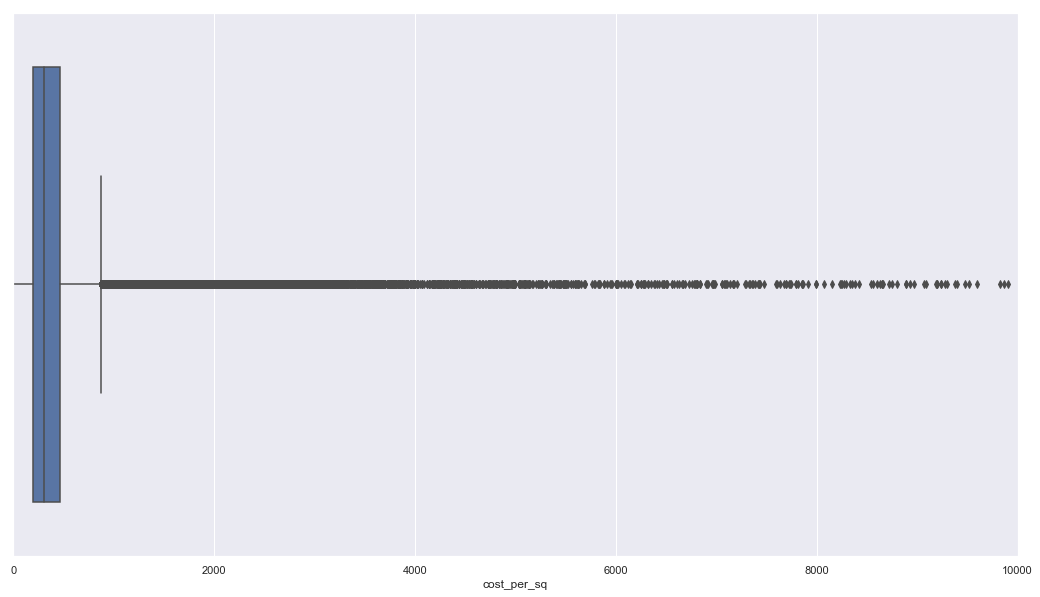

In [58]:
non_zero_sqft['cost_per_sq'] = (non_zero_sqft.sale_price / non_zero_sqft.gross_square_feet)
# non_zero_sqft.cost_per_sq.replace(np.inf, 0, inplace=True)
non_zero_sqft.cost_per_sq.replace(np.NaN, 0, inplace=True)

x = sns.boxplot(non_zero_sqft.cost_per_sq)
x.set(xlim=(0,10000))

np.percentile(non_zero_sqft.cost_per_sq,[3,4,5,6,7,8,9,10])


There are some data which cost more than 100000USD per sqft, which is not reasonable, by printing out these data, I realized that is because of the noise of gross_sqft, how to combine and filter land sqft and gross sqft will be the next mission.

In [59]:
non_zero_sqft[(non_zero_sqft.cost_per_sq >= 100000)]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,cost_per_sq
130520,3,midwood,05 TAX CLASS 1 VACANT LAND,1,7628,16,,B3,1171 EAST 28TH STREET,,11210.0,2,0,2,6667.0,1.0,1940.0,1,V0,1810000.0,11/14/14,1810000.0
211732,4,richmond_hill,02 TWO FAMILY DWELLINGS,1,9417,42,,B1,97-30 116 STREET,,11419.0,2,0,2,2785.0,1.0,2010.0,1,B1,260000.0,6/28/13,260000.0
214277,4,st_albans,41 TAX CLASS 4 - OTHER,4,12406,122,,Z9,116-21 MERRICK BOULEVARD,,11434.0,0,0,0,6871.0,1.0,2005.0,4,Z9,160000.0,3/5/13,160000.0
222206,4,forest_hills,01 ONE FAMILY DWELLINGS,1,2193,42,,A5,110-45 68TH ROAD,,11375.0,1,0,1,6242.0,1.0,2009.0,1,A5,1350000.0,1/13/14,1350000.0
226310,4,little_neck,01 ONE FAMILY DWELLINGS,1,8340,71,,A1,56-15 251ST STREET,,11362.0,1,0,1,5429.0,2.0,1945.0,1,A1,345000.0,6/2/14,172500.0
230853,4,south_jamaica,03 THREE FAMILY DWELLINGS,1,10238,53,,C0,169-01 107TH AVENUE,,11433.0,3,0,3,16000.0,1.0,2008.0,1,C0,710000.0,9/12/14,710000.0
249053,4,south_jamaica,03 THREE FAMILY DWELLINGS,1,10238,53,,C0,169-01 107TH AVENUE,,11433.0,3,0,3,16000.0,1.0,2008.0,1,C0,999000.0,4/24/15,999000.0
269926,4,astoria,02 TWO FAMILY DWELLINGS,1,511,22,,B1,12-02 27TH AVENUE,,11102.0,2,0,2,4290.0,1.0,2015.0,1,B1,1425550.0,12/11/17,1425550.0
298867,4,jamaica,41 TAX CLASS 4 - OTHER,4,9796,63,NaN,Z2,90-02 168TH STREET,NaN,11432.0,0,1,1,99500.0,40.0,0.0,4,Z2,20500000.0,12/27/18,512500.0
352427,5,arrochar,01 ONE FAMILY DWELLINGS,1,3103,1,,A1,105 HASTINGS STREET,,10305.0,\t1,\t-,\t1,6000.0,2.0,2006.0,1,A1,385000.0,2/16/2016,192500.0


## 2.6 building_class_category, tax_class_at_time_of_sale, tax_class_at_present,  building_class_at_time_of_sale, building_class_at_present

* Condo -- buy a house, more expensive, you own what you own. 

* Coop  -- buy a share from the company who owns the building, chearper price, 75% of NYC house market(we can check later), strict rental condition, high maintanace fee.

In [60]:
dtype={'land_square_feet': int}
dtype={'gross_square_feet': int}
dtype={'year_built': int}

In [61]:
# WHY?
nyc5 = pd.read_csv('data/NYC/nyc4.csv', index_col=False)

In [62]:
# Change square_feet to sqft
nyc5.columns = ['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'easement',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date']

In [63]:
nyc5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371250 entries, 0 to 371249
Data columns (total 21 columns):
borough                           371250 non-null int64
neighborhood                      371250 non-null object
building_class_category           371250 non-null object
tax_class_at_present              371209 non-null object
block                             371250 non-null int64
lot                               371250 non-null int64
easement                          312951 non-null object
building_class_at_present         371209 non-null object
address                           371250 non-null object
apartment_number                  325772 non-null object
zip_code                          371248 non-null float64
residential_units                 371209 non-null object
commercial_units                  371209 non-null object
total_units                       371209 non-null object
land_sqft                         371209 non-null float64
gross_sqft                        3

In [64]:
#nyc5.building_class_category.value_counts()

### 2.6.1 Building class Category:

This is a field that we are including so that users of the Rolling Sales Files can easily
identify similar properties by broad usage (e.g. One Family Homes) without looking up
individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class
Category, Block and Lot.

* Format this column

In [65]:
nyc5.building_class_category = nyc5.building_class_category.str.replace(' - ','_')
nyc5.building_class_category = nyc5.building_class_category.str.replace('  ',' ')
nyc5.building_class_category = nyc5.building_class_category.str.strip()
nyc5.building_class_category = nyc5.building_class_category.str.replace(' ','_')
nyc5.building_class_category = nyc5.building_class_category.str.replace('-','_')
nyc5.building_class_category = nyc5.building_class_category.str.replace('/','_')
nyc5.building_class_category = nyc5.building_class_category.str.lower()

In [66]:
# nyc5.building_class_category.value_counts()

In [67]:
# uni = nyc5.building_class_category.unique()
# uni.sort()
# uni

### 2.6.2 Building Class:

The Building Classification is used to describe a property’s constructive use. The first
position of the Building Class is a letter that is used to describe a general class of
properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R”
signifies condominiums). The second position, a number, adds more specific information
about the property’s use or construction style (using our previous examples “A0” is a Cape
Cod style one family home, “O4” is a tower type office building and “R5” is a commercial
condominium unit). The term Building Class as used by the Department of Finance is
interchangeable with the term Building Code as used by the Department of Buildings. 

#### 2.6.2.1 building_class_at_time_of_sale:

In [68]:
# clean column
# nyc5.building_class_at_time_of_sale.value_counts()

#### 2.6.2.2 building_class_at_present:

In [69]:
# First trying to groupby and see if there is any relationship between tax class 
# or building class, and forward fill & backward fill them, but so far cannot 
# find the relationship between them, going to put NaN in stead.

# nyc5.building_class_at_present.unique()
# nyc5[nyc5.building_class_at_present==' ']
# tax_class_at_present_filling = nyc5.groupby(['tax_class_at_time_of_sale', 'building_class_category', 'block', 'lot', 'building_class_at_present', 'tax_class_at_present']).size().to_frame(name='count').reset_index()
nyc5.building_class_at_present = nyc5.building_class_at_present.str.replace('  ', '0')
nyc5.building_class_at_present = nyc5.building_class_at_present.str.replace(' ' , '0')

In [70]:
nyc5.building_class_at_present.fillna('0', inplace=True)

In [71]:
# nyc5.building_class_at_present.unique()

In [72]:
# nyc5.building_class_at_time_of_sale.value_counts()

### 2.6.3 Tax Class:

Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4),
based on the use of the property.

* Class 1: Includes most residential property of up to three units (such as one-, two-, and three-family homes and small stores or offices with one or two attached apartments), vacant land that is zoned for residential use, and most condominiums that are not more than three stories.
* Class 2: Includes all other property that is primarily residential, such as cooperatives and condominiums.
* Class 3: Includes property with equipment owned by a gas, telephone or electric company.
* Class 4: Includes all other properties not included in class 1,2, and 3, such as offices, factories, warehouses, garage buildings, etc. 


#### 2.6.3.1 tax_class_at_present:

In [73]:
# It is a clean column
nyc5.tax_class_at_time_of_sale.value_counts()

2    182964
1    161167
4     27109
3        10
Name: tax_class_at_time_of_sale, dtype: int64

#### 2.6.3.2 tax_class_at_present:

In [74]:
# There are some missing values, gonna try using forward filling.

# tax_class_at_present_filling = nyc5.groupby(['tax_class_at_time_of_sale', 'building_class_category', 'total_units', 'tax_class_at_present']).size().to_frame(name='count').reset_index()
# tax_class_at_present_filling
nyc5.tax_class_at_present = nyc5.tax_class_at_present.str.replace('  ', '0')
nyc5.tax_class_at_present = nyc5.tax_class_at_present.str.replace(' ' , '0')
nyc5.tax_class_at_present.fillna('0', inplace=True)

In [75]:
nyc5.tax_class_at_present.unique()

array(['1', '1C', '2A', '2B', '2', '2C', '4', '0', '1A', '1B', '3', '1D'],
      dtype=object)

In [76]:
# nyc5.building_class_at_time_of_sale.value_counts()

In [77]:
# tax1 = test[test.tax_class_at_time_of_sale==1]
# tax2 = test[test.tax_class_at_time_of_sale==2]
# tax3 = test[test.tax_class_at_time_of_sale==3]
# tax4 = test[test.tax_class_at_time_of_sale==4]

In [78]:
# tax2.tax_class_at_present.unique()

In [79]:
# tax3.tax_class_at_present.unique()

In [80]:
# tax4.tax_class_at_present.unique()

In [81]:
# tax1.building_class_category.unique()

In [82]:
# tax2.building_class_category.unique()

In [83]:
# tax3.building_class_category.unique()

In [84]:
# tax4.building_class_category.unique()

In [85]:
# tax1.building_class_at_time_of_sale.unique()

In [86]:
# tax2.building_class_at_time_of_sale.unique()

In [87]:
# tax3.building_class_at_time_of_sale.unique()

In [88]:
# tax4.building_class_at_time_of_sale.unique()

In [89]:
nyc5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371250 entries, 0 to 371249
Data columns (total 21 columns):
borough                           371250 non-null int64
neighborhood                      371250 non-null object
building_class_category           371250 non-null object
tax_class_at_present              371250 non-null object
block                             371250 non-null int64
lot                               371250 non-null int64
easement                          312951 non-null object
building_class_at_present         371250 non-null object
address                           371250 non-null object
apartment_number                  325772 non-null object
zip_code                          371248 non-null float64
residential_units                 371209 non-null object
commercial_units                  371209 non-null object
total_units                       371209 non-null object
land_sqft                         371209 non-null float64
gross_sqft                        3

## 2.7 lot, block

### 2.7.1 lot:
A Tax Lot is a subdivision of a Tax Block and represents the property unique location.

In [90]:
# This column is clean
# nyc5.lot.unique()
# nyc5[nyc5.lot.isnull()]

### 2.7.2 block:
A Tax Block is a sub-division of the borough on which real properties are located.
The Department of Finance uses a Borough-Block-Lot classification to label all real
property in the City. “Whereas” addresses describe the street location of a property, the
block and lot distinguishes one unit of real property from another, such as the different
condominiums in a single building. Also, block and lots are not subject to name changes
based on which side of the parcel the building puts its entrance on. 

In [91]:
# This column is clean
# nyc5.block.unique()
# nyc5[nyc5.block.isnull()]

In [92]:
nyc5.to_csv('data/NYC/nyc5.csv', index=False)

In [93]:
nyc6 = pd.read_csv('data/NYC/nyc5.csv', index_col=False) 

## 2.8 address , apartment_number, zip_code

### 2.8.1 address:
The street address of the property as listed on the Sales File. Coop sales
include the apartment number in the address field. 

In [94]:
nyc6.address = nyc6.address.str.replace('-','_')
nyc6.address = nyc6.address.str.strip()
nyc6.address = nyc6.address.str.replace('/','_')
nyc6.address = nyc6.address.str.replace('.','')
nyc6.address = nyc6.address.str.replace(',','_')
nyc6.address = nyc6.address.str.replace(' ','_')
nyc6.address = nyc6.address.str.replace('__','_')
nyc6.address = nyc6.address.str.replace('___','_')
nyc6.address = nyc6.address.str.lower()

In [95]:
# nyc6.address.value_counts()

### 2.8.2 apartment_number

In [96]:
nyc6.apartment_number = nyc6.apartment_number.replace('            ','0')
nyc6.apartment_number = nyc6.apartment_number.replace(' ','0')
nyc6.apartment_number = nyc6.apartment_number.str.rstrip()
nyc6.apartment_number = nyc6.apartment_number.str.replace('/','_')
nyc6.apartment_number = nyc6.apartment_number.str.replace('-','_')
nyc6.apartment_number = nyc6.apartment_number.str.replace(',','_')
nyc6.apartment_number = nyc6.apartment_number.str.replace(' ','_')
nyc6.apartment_number = nyc6.apartment_number.str.replace('`','_')
nyc6.apartment_number = nyc6.apartment_number.str.replace('.','')
nyc6.apartment_number = nyc6.apartment_number.replace('_','0')

In [97]:
nyc6.apartment_number = nyc6.apartment_number.str.lower()

In [98]:
nyc6.apartment_number.fillna('0', inplace=True)

In [99]:
# nyc6.apartment_number.value_counts()

### 2.8.2 zip_code:
The property’s postal code 

In [100]:
nyc6.zip_code.fillna('0', inplace=True)

In [101]:
# nyc6.info()

In [102]:
nyc6.to_csv('data/NYC/nyc6.csv', index=False)

In [103]:
nyc7 = pd.read_csv('data/NYC/nyc6.csv', index_col=False)

## 2.9 residential_units, commercial_units, total_units 
For the columns organzied above(except gross sqft, land sqft), the columns do not contain value 0, so nan are replaced with value 0. Here columns(residential_units, commercial_units, total_units) + columns(gross sqft, land sqft) originally have 0 value, but since the 0 value in there is same as NaN, so going to first fill the NaN with 0 in these five columns. 

### 2.9.1 residential_units:

In [104]:
nyc7.residential_units.isnull().sum()

41

In [105]:
type(nyc7.residential_units.iloc[98304])

int

In [106]:
# nyc7.residential_units.value_counts()

In [107]:
# nyc7.residential_units.head(50)

If I do not turn this column into str in the first place, later when use the str.replace, the null value will increase to 76000+, they turn some of the 0 value into null with no reason, so have to save this column into string first

In [108]:
nyc7.residential_units = nyc7.residential_units.astype(str)

In [109]:
nyc7.residential_units.isnull().sum()

0

In [110]:
nyc7.residential_units = nyc7.residential_units.replace('\t', '')
nyc7.residential_units = nyc7.residential_units.str.strip()
nyc7.residential_units = nyc7.residential_units.replace('-', '0')
nyc7.residential_units = nyc7.residential_units.str.replace(',','')
nyc7.residential_units = nyc7.residential_units.replace('nan','0')


nyc7.residential_units.isnull().sum()

0

In [111]:
nyc7.residential_units = nyc7.residential_units.astype(float).astype(int)

In [112]:
# type(nyc7.residential_units.iloc[98304])

In [113]:
# nyc7.residential_units.iloc[98304]

In [114]:
# nyc7.residential_units.value_counts()

### 2.9.2 Commercial_units

In [115]:
nyc7.commercial_units = nyc7.commercial_units.astype(str)

In [116]:
nyc7.commercial_units.isnull().sum()

0

In [117]:
nyc7.commercial_units = nyc7.commercial_units.replace('\t', '')
nyc7.commercial_units = nyc7.commercial_units.str.strip()
nyc7.commercial_units = nyc7.commercial_units.replace('-', '0')
nyc7.commercial_units = nyc7.commercial_units.str.replace(',','')
nyc7.commercial_units = nyc7.commercial_units.replace('nan','0')


nyc7.commercial_units.isnull().sum()

0

In [118]:
nyc7.commercial_units = nyc7.commercial_units.astype(float).astype(int)

### 2.9.3 Total_units

In [119]:
nyc7.total_units = nyc7.total_units.astype(str)

In [120]:
nyc7.total_units.isnull().sum()

0

In [121]:
nyc7.total_units = nyc7.total_units.replace('\t', '')
nyc7.total_units = nyc7.total_units.str.strip()
nyc7.total_units = nyc7.total_units.replace('-', '0')
nyc7.total_units = nyc7.total_units.str.replace(',','')
nyc7.total_units = nyc7.total_units.replace('nan','0')


nyc7.total_units.isnull().sum()

0

In [122]:
nyc7.total_units = nyc7.total_units.astype(float).astype(int)

In [123]:
# nyc7.total_units.value_counts()

In [124]:
# Stop point for testing set

## 2.9.4 Drop rows that do not add up:

In [125]:
# By grouping and observation, we realize some rows which 
# residential_units + commercial_units != total_units
# And the counts with these do not add up are small

adds_up = []

rct = nyc7.groupby(['residential_units', 'commercial_units', 'total_units']).size().to_frame(name='count').reset_index()
len(rct)

for i in tqdm(range(0, len(nyc7))):
    if nyc7.residential_units.iloc[i] + nyc7.commercial_units.iloc[i] == nyc7.total_units.iloc[i]:
        adds_up.append(i)

In [126]:
nyc7 = nyc7.iloc[adds_up]

In [127]:
# len(adds_up)
# rct = nyc7.groupby(['residential_units', 'commercial_units', 'total_units']).size().to_frame(name='count').reset_index()

## 2.9.5 Fill in 0 for null value in gross_sqft, land_sqft

In [128]:
nyc7.land_sqft.fillna('0', inplace=True)

In [129]:
nyc7.gross_sqft.fillna('0', inplace=True)

In [130]:
nyc7.to_csv('data/NYC/nyc7.csv', index=False)

In [131]:
nyc8 = pd.read_csv('data/NYC/nyc7.csv', index_col=False)

/Users/justin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
# nyc8.info()

## 2.10 Easement, sale_date

### 2.10.1 Easement:

An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property. 

In [133]:
nyc8.easement.value_counts()

     302732
E         1
Name: easement, dtype: int64

In [134]:
nyc8[nyc8.easement=='E']

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
338201,5,huguenot,41_tax_class_4_other,4,6821,61,E,Z7,90_west_terrace,0,10312.0,0,0,0,1000.0,0.0,0.0,4,Z7,5000.0,8/20/15


Since the easement column is not really useful in this case, I am just going to drop the whole column.

In [135]:
nyc9 = nyc8.drop('easement', axis=1)

### 2.10.2 Sale_date:

In [136]:
# nyc9.info()

what is a good format of time to do ML, and plotting?

In [137]:
type(nyc9.sale_date.iloc[1])

str

format them into datetime format: 

In [138]:
# pd.set_option('display.max_rows', None)

nyc9.sale_date.str.replace('2016', '16')
nyc9.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,alphabet_city,02_two_family_dwellings,1,375,41,S2,65_avenue_d,0,10009.0,2,1,3,1614.0,3040.0,1899.0,1,S2,1560000.0,7/18/13
1,1,alphabet_city,03_three_family_dwellings,1,377,66,C0,243_east_7th__street,0,10009.0,3,0,3,2381.0,3084.0,1899.0,1,C0,3150000.0,3/6/13
2,1,alphabet_city,04_tax_class_1_condos,1C,399,1102,R6,238_east_4th__street,0,10009.0,1,0,1,0.0,0.0,1955.0,1,R6,3450000.0,3/27/13
3,1,alphabet_city,07_rentals_walkup_apartments,2A,376,26,C3,268_east_7th_street,0,10009.0,4,0,4,2065.0,3491.0,1900.0,2,C3,3650100.0,8/23/13
4,1,alphabet_city,07_rentals_walkup_apartments,2B,385,1,C7,17_avenue_b,0,10009.0,7,1,8,2093.0,5852.0,1997.0,2,C7,283.0,4/18/13


In [139]:
nyc9.sale_date= pd.to_datetime(nyc9.sale_date) 
  
nyc9.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360854 entries, 0 to 360853
Data columns (total 20 columns):
borough                           360854 non-null int64
neighborhood                      360854 non-null object
building_class_category           360854 non-null object
tax_class_at_present              360854 non-null object
block                             360854 non-null int64
lot                               360854 non-null int64
building_class_at_present         360854 non-null object
address                           360854 non-null object
apartment_number                  360854 non-null object
zip_code                          360854 non-null float64
residential_units                 360854 non-null int64
commercial_units                  360854 non-null int64
total_units                       360854 non-null int64
land_sqft                         360854 non-null float64
gross_sqft                        360854 non-null float64
year_built                        360

## 2.10 Some thoughts before dropping rows or columns:
For those with square feet = 0, if I dropped these rows, there will only be half of the data left, so my current strategy is:

* First of all, if one rows have more than half of the features that I think will affect the price is missing, drop them.

* Then, prepare 3 dataset, one keep all the NaN, one turns NaN to 0, one drop them all. See which one perform better in ML.

## 2.10.1 nyc9 is a dataframe with all the missing value been placed as 0

In [140]:
nyc9.to_csv('data/NYC/nyc9.csv', index=False)

In [141]:
# nyc9.to_csv('data/NYC/nyc_train_and_test.csv', index=False)

In [142]:
# Stop point for testing set

## 2.10.2 nyc10 is a dataframe with all the 0 in certain columns been drop, for plotting and ML purpose.

Now, for plotting purpose, going to drop all the zero value row for plotting purpose, will first start with year_built, gross_sqft, land_sqft

In [143]:
to_clean = pd.read_csv('data/NYC/nyc9.csv', index_col=False)

In [144]:
clean_year = to_clean[to_clean.year_built != 0]

In [145]:
clean_land_sqft = clean_year[clean_year.land_sqft != 0]

In [146]:
clean_gross_sqft = clean_land_sqft[clean_land_sqft.gross_sqft != 0]

After dropping 0 in year, land_sqft, gross_sqft, there are no 0 in column tax_class_at_present, building_class_at_present, address, apartment number

In [147]:
# Drop the thirty 0 in zip_code:
clean_zip_code = clean_gross_sqft[clean_gross_sqft.zip_code != 0]

Since total_units = residential_units + commercial_units, so here going to only drop the 0 in total_units

In [148]:
clean_total_units = clean_zip_code[clean_zip_code.total_units != 0]

In [149]:
clean_total_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184822 entries, 0 to 360853
Data columns (total 20 columns):
borough                           184822 non-null int64
neighborhood                      184822 non-null object
building_class_category           184822 non-null object
tax_class_at_present              184822 non-null object
block                             184822 non-null int64
lot                               184822 non-null int64
building_class_at_present         184822 non-null object
address                           184822 non-null object
apartment_number                  184822 non-null object
zip_code                          184822 non-null float64
residential_units                 184822 non-null int64
commercial_units                  184822 non-null int64
total_units                       184822 non-null int64
land_sqft                         184822 non-null float64
gross_sqft                        184822 non-null float64
year_built                        184

In [150]:
clean_total_units.to_csv('data/NYC/nyc10.csv', index=False)

## 2.10.3 nyc11 is to drop the rows which have more than half of the values in these columns(year_built, tax_class_at_present, building_class_at_present, land_sqft, gross_sqft, zip_code, apartment_number, total_units) == 0, since if we drop every rows that contain 0, there will only be half of the rows left.

In [151]:
find_zero = pd.read_csv('data/NYC/nyc9.csv', index_col=False)

In [152]:
find_zero1 = find_zero[['year_built', 'tax_class_at_present', 'building_class_at_present', 'land_sqft', 'gross_sqft', 'zip_code', 'apartment_number', 'total_units']]

find_zero1.head()

,year_built,tax_class_at_present,building_class_at_present,land_sqft,gross_sqft,zip_code,apartment_number,total_units
0,1899.0,1,S2,1614.0,3040.0,10009.0,0,3
1,1899.0,1,C0,2381.0,3084.0,10009.0,0,3
2,1955.0,1C,R6,0.0,0.0,10009.0,0,1
3,1900.0,2A,C3,2065.0,3491.0,10009.0,0,4
4,1997.0,2B,C7,2093.0,5852.0,10009.0,0,8


In [154]:
(find_zero1 == 0).head()

,year_built,tax_class_at_present,building_class_at_present,land_sqft,gross_sqft,zip_code,apartment_number,total_units
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [155]:
find_zero2 = (find_zero1 == 0).astype(int)

In [156]:
find_zero2.head()

,year_built,tax_class_at_present,building_class_at_present,land_sqft,gross_sqft,zip_code,apartment_number,total_units
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [157]:
amount_of_zero = find_zero2.sum(axis=1)

In [158]:
amount_of_zero.head()

0    0
1    0
2    2
3    0
4    0
dtype: int64

In [159]:
find_zero2['amount_of_zero_in_row'] = amount_of_zero

In [160]:
find_zero2.head()

,year_built,tax_class_at_present,building_class_at_present,land_sqft,gross_sqft,zip_code,apartment_number,total_units,amount_of_zero_in_row
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


Since we have 8 features here, so I am now going to only keep index that have amount_of_zero_in_row <= 4

In [161]:
rows_to_keep = []

for i in tqdm(range(0, len(find_zero2))):
    if find_zero2.amount_of_zero_in_row.iloc[i] <= 4:
        rows_to_keep.append(i)

In [162]:
len(rows_to_keep)

360160

In [163]:
nyc11 = nyc9.iloc[rows_to_keep]

In [164]:
nyc11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360160 entries, 0 to 360853
Data columns (total 20 columns):
borough                           360160 non-null int64
neighborhood                      360160 non-null object
building_class_category           360160 non-null object
tax_class_at_present              360160 non-null object
block                             360160 non-null int64
lot                               360160 non-null int64
building_class_at_present         360160 non-null object
address                           360160 non-null object
apartment_number                  360160 non-null object
zip_code                          360160 non-null float64
residential_units                 360160 non-null int64
commercial_units                  360160 non-null int64
total_units                       360160 non-null int64
land_sqft                         360160 non-null float64
gross_sqft                        360160 non-null float64
year_built                        360

In [165]:
nyc11.to_csv('data/NYC/nyc11.csv', index=False)

## 2.10.4 nyc12 will be the dataset with all the 0 been replaced as NAN, see if xgboosting and LGBM boosting will generate with a better result.

In [166]:
to_nan = pd.read_csv('data/NYC/nyc11.csv', index_col=False)

In [167]:
to_nan1 = to_nan.astype(str)
to_nan2 = to_nan1.replace('0', np.nan)
to_nan3 = to_nan2.replace('0.0', np.nan)

In [168]:
to_nan3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360160 entries, 0 to 360159
Data columns (total 20 columns):
borough                           360160 non-null object
neighborhood                      360160 non-null object
building_class_category           360160 non-null object
tax_class_at_present              358020 non-null object
block                             360160 non-null object
lot                               360160 non-null object
building_class_at_present         358020 non-null object
address                           360160 non-null object
apartment_number                  74435 non-null object
zip_code                          359006 non-null object
residential_units                 242178 non-null object
commercial_units                  23429 non-null object
total_units                       255191 non-null object
land_sqft                         192266 non-null object
gross_sqft                        192755 non-null object
year_built                        33

In [169]:
to_nan.to_csv('data/NYC/nyc12.csv', index=False)

In [ ]:
Stop point for training set

# 3.0 To clean the testing data set
For the data set to stay in the same format but not been filter with others, going to concate the train and test up there and run thru every formating functions but avoid the filtering one such as the total unit one, filter out the zero one's, or any other function that will changw the values of the data. After we get our cleaned testing, we will run again all of the above for the traing

In [171]:
clean_for_testing = pd.read_csv('data/NYC/nyc_train_and_test.csv', index_col=False)

## 3.1 Only keep the 2019 in sale_date

In [180]:
clean_for_testing.sale_date= pd.to_datetime(clean_for_testing.sale_date) 

In [182]:
nyc_test = clean_for_testing[clean_for_testing.sale_date.dt.year == 2019]

In [183]:
nyc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42790 entries, 371250 to 428895
Data columns (total 20 columns):
borough                           42790 non-null int64
neighborhood                      42790 non-null object
building_class_category           42790 non-null object
tax_class_at_present              42790 non-null object
block                             42790 non-null int64
lot                               42790 non-null int64
building_class_at_present         42790 non-null object
address                           42790 non-null object
apartment_number                  42790 non-null object
zip_code                          42790 non-null float64
residential_units                 42790 non-null int64
commercial_units                  42790 non-null int64
total_units                       42790 non-null int64
land_sqft                         42790 non-null float64
gross_sqft                        42790 non-null float64
year_built                        42790 non-null

In [185]:
nyc_test.to_csv('data/NYC/nyc_test.csv', index=False)

# traditional model 0 for numeric, 
# xgboosting and LGBMboosting, can just leave the apartment number empty they accept it

In [ ]:
#nyc3.apartment_number.value_counts() 

## check out altair for visualization
